In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from data_gen import get_agent_distribution_and_losses_nels, get_types_and_noise, get_types_loss_and_noise, generate_hrs_work_losses, generate_covariates
from utils import compute_continuity_noise
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from scipy.stats import pearsonr

In [3]:
np.random.seed(0)
d=9
prev_beta = np.ones(d)/np.sqrt(d)

In [3]:
agent_dist, all_types_and_losses, all_labels, month_attended_losses, eta_losses, sigma = get_agent_distribution_and_losses_nels(n=1000000,
                                                                                              prev_beta=prev_beta, n_clusters=8,
                                                                                              seed=0)

19.54284465637207


In [4]:
sample_idx = np.random.choice(list(range(len(all_types_and_losses))), 1000)
sample_types = all_types_and_losses[sample_idx]
sample_labels = all_labels[sample_idx]
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(sample_types)

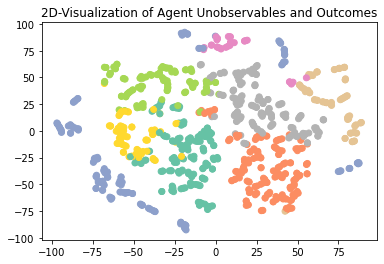

In [5]:
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=sample_labels, cmap="Set2")
plt.title("2D-Visualization of Agent Unobservables and Outcomes")
plt.savefig("figs/paper-figure-5.pdf")

In [4]:
X, socio_econ, _ = generate_covariates()
_, month_attended_losses, eta_losses, _ = get_types_loss_and_noise(prev_beta)

19.54284465637207


In [7]:
hrs_work_losses, _ = generate_hrs_work_losses()

In [8]:
pearsonr(socio_econ.flatten(), hrs_work_losses.flatten())

(0.027335077880884788, 0.0008417304508923745)

In [7]:
pearsonr(socio_econ.flatten(), month_attended_losses.flatten())

(-0.4432570175879141, 0.0)

In [8]:
pearsonr(socio_econ.flatten(), eta_losses.flatten())

(-0.07706254920242879, 4.315644375464243e-21)

In [9]:
sigma

4.920051987112388